# `segysak` for SEG-Y data

This new tool was made by Tony Hallam and substantially improved at the TRANSFORM 2020 hackathon in June.

[Read the docs.](https://segysak.readthedocs.io/en/latest/)

You'll need to install the library:

    pip install segysak

## What does it look like in `segyio`?

In [2]:
import segyio
import numpy as np

ds = np.DataSource('../data')  # <- Local target.
url = 'https://geocomp.s3.amazonaws.com/data/Penobscot_0-1000ms.sgy'
fname = ds.open(url).name  # <-- Could use any local file name.

with segyio.open(fname) as s:
    vol = segyio.cube(s)

In [3]:
vol.shape, vol.dtype

((601, 481, 251), dtype('float32'))

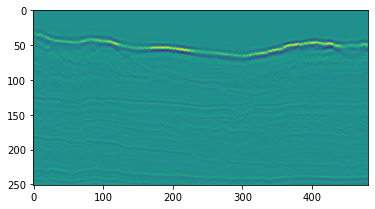

In [4]:
import matplotlib.pyplot as plt

plt.imshow(vol[100].T)

## Scanning with SegySAK

In [6]:
from segysak.segy import segy_header_scrape, segy_header_scan

# Get all the trace headers.
h = segy_header_scrape(fname, partial_scan=1000)

/home/matt/miniconda3/envs/geocomp/lib/python3.9/site-packages/segysak/segy/_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0.00/1.00k [00:00<?, ? traces/s]

In [7]:
h.head()

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,2,1000,0,0,1000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1000,0,0,1001,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,4,1000,0,0,1002,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,5,1000,0,0,1003,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,6,1000,0,0,1004,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Get statistics from the trace headers.
h = segy_header_scan(fname, max_traces_scan=289_000)
h

  0%|          | 0.00/289k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,289000.0,240.943945,138.831203,1.0,121.00,241.0,361.00,481.0
TRACE_SEQUENCE_FILE,5,289000.0,144325.552678,83427.167067,0.0,72075.75,144325.5,216575.25,288825.0
FieldRecord,9,289000.0,1299.915917,173.445405,1000.0,1150.00,1300.0,1450.00,1600.0
TraceNumber,13,289000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
EnergySourcePoint,17,289000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,289000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,289000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,289000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,289000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


## Reading the data

In [ ]:
# I cannot get this to work.

# from segysak.segy import segy_loader

# # Load a 100 x 100 subvolume. 
# s_ = segy_loader(fname, xy_crop=[7300000, 7305000, 48910000, 48911000])

In [9]:
from segysak.segy import segy_loader

# Load a 100 x 100 subvolume. 
s = segy_loader(fname, ix_crop=[1100, 1200, 1100, 1200])

  0%|          | 0.00/289k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/289k [00:00<?, ? traces/s]

In [10]:
s

<xarray.Dataset>
Dimensions:  (iline: 101, xline: 101, twt: 251)
Coordinates:
  * iline    (iline) uint16 1100 1101 1102 1103 1104 ... 1197 1198 1199 1200
  * xline    (xline) uint16 1100 1101 1102 1103 1104 ... 1197 1198 1199 1200
  * twt      (twt) float64 0.0 4.0 8.0 12.0 16.0 ... 988.0 992.0 996.0 1e+03
    cdp_x    (iline, xline) float32 7.336e+05 7.336e+05 ... 7.352e+05 7.353e+05
    cdp_y    (iline, xline) float32 4.892e+06 4.892e+06 ... 4.895e+06 4.895e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 ... 899.0 -2.638e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01  Created by: OpendTect     (Sun 21 Feb 2016, 12:...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         Penobscot_0-1000ms.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-12998.136565964387, -12722.71822511512, -2010.3064...
    coord_scalar:        -10.0

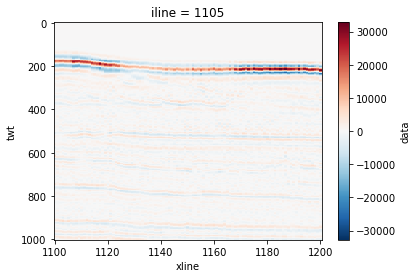

In [11]:
s.data[5].T.plot(yincrease=False)

<AxesSubplot:xlabel='cdp x', ylabel='cdp y'>

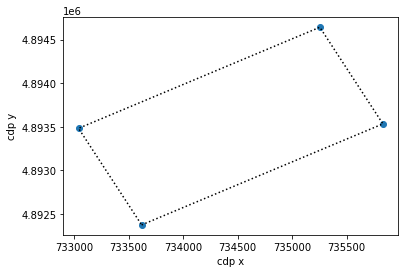

In [12]:
s.seis.plot_bounds()

In [13]:
import numpy as np

arb = np.array([
    [733000, 4892500],
    [735550, 4894500]
]).T

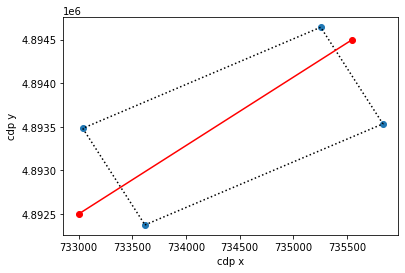

In [14]:
ax = s.seis.plot_bounds()
ax.plot(*arb, 'ro-')

In [15]:
s1 = s.seis.interp_line(*arb)

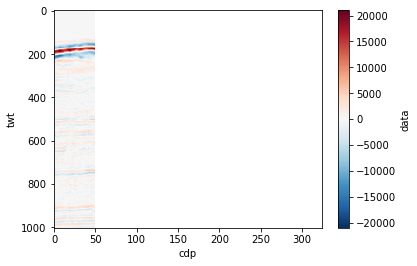

In [16]:
s1.data.T.plot(yincrease=False)